In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout


In [4]:
# Load stock market data
# Example: Fetch data from Yahoo Finance using pandas_datareader

from pandas_datareader import data as pdr
import yfinance as yf

# Define stock symbol and date range
stock_symbol = 'AAPL'  # Apple stock
start_date = '2015-01-01'
end_date = '2023-01-01'

# Fetch data using yfinance
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Display the first few rows
df.head()



[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02,24.347172,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05,23.661278,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06,23.663498,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07,23.995316,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08,24.917271,27.972500,28.037500,27.174999,27.307501,237458000


In [5]:
# Select the 'Close' price for prediction
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

data = df['Close'].values.reshape(-1, 1)

# Scale data to range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Prepare the data for LSTM
sequence_length = 60  # Use past 60 days to predict the next day
X, y = [], []
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data[i-sequence_length:i, 0])
    y.append(scaled_data[i, 0])

# Convert to numpy arrays
X, y = np.array(X), np.array(y)

# Reshape X for LSTM (samples, timesteps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))


In [6]:
# Split data (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [12]:
# Build the LSTM model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=False),
    Dropout(0.2),
    Dense(units=25),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [8]:
# Train the model
epochs = 50
batch_size = 32

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_test, y_test))


Epoch 1/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0163 - val_loss: 0.0022
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0012 - val_loss: 0.0016
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0010 - val_loss: 0.0015
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 8.9549e-04 - val_loss: 0.0015
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 9.2732e-04 - val_loss: 0.0022
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.3961e-04 - val_loss: 0.0015
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 8.0646e-04 - val_loss: 0.0016
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 6.6491e-04 - val_loss: 0.0014
Epoch 9/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.8170e-04 - val_loss: 0.0014
Epoch 10/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 6.4436e-04 - val_loss: 0.0020
Epoch 11/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.2477e-04 - val_loss: 0.0020
Epoch 12/50
49/49 ━━━━━━━━━━━━━━━━━━━━

In [9]:
# Predict on the test set
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

# Inverse transform y_test for comparison
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


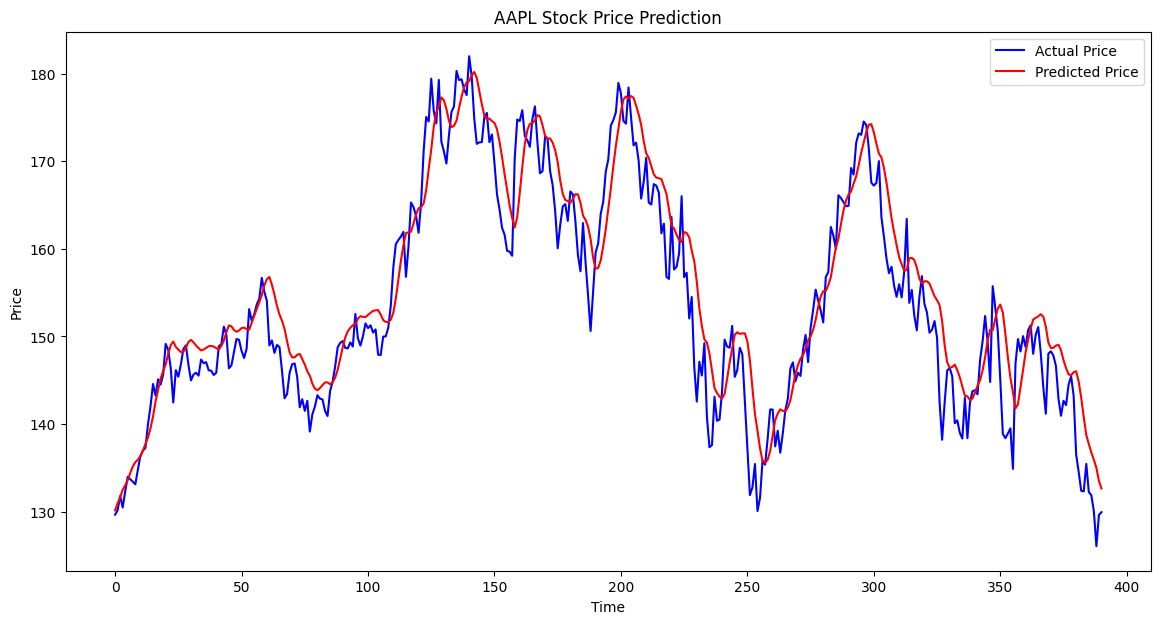

In [10]:
# Plot actual vs predicted prices
plt.figure(figsize=(14, 7))
plt.plot(y_test_actual, label='Actual Price', color='blue')
plt.plot(predictions, label='Predicted Price', color='red')
plt.title(f'{stock_symbol} Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [11]:
# Save the trained model
model.save('stock_price_prediction_model.h5')

# Load the model for future use
from tensorflow.keras.models import load_model
loaded_model = load_model('stock_price_prediction_model.h5')
